In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math
from sklearn.linear_model import LinearRegression

%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"

In [2]:
with open('rif.txt') as f:
    lines = f.readlines()

In [3]:
X = list()
Y = list()

for line in lines[1:]:
    line = line.replace('\t', ' ').replace('\n', '').split(' ')
    X.append(float(line[1]))
    Y.append(float(line[2]))

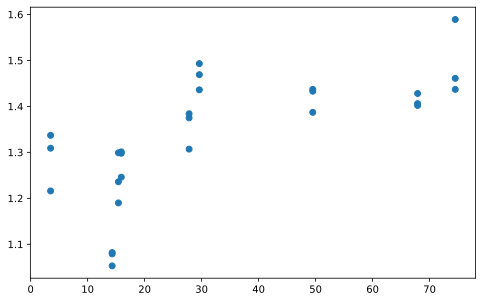

In [4]:
plt.scatter(X, Y)

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
n = len(X)
m = 3

X_sup = np.zeros((n, m))

for k in range(m):
    X_sup[:, k] = X**k

Parameters
sec: 0.49349565806547857
Коэффициенты модели: [ 0.00000000e+00  7.37983025e-03 -4.48152501e-05]
Свободный член: 1.166510163678185


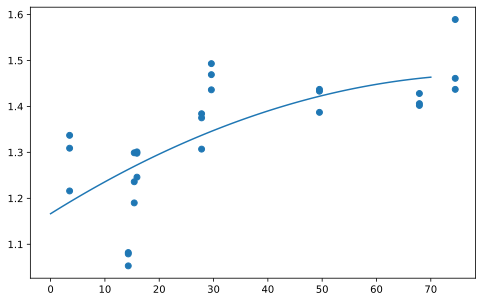

In [7]:
Liner = LinearRegression().fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

x = np.linspace(0, 70, 100)

xs = np.zeros((100, m))

for k in range(m):
    xs[:, k] = x**k
    
Y_new = np.matmul(xs, a) + b

plt.plot(x, Y_new)
plt.scatter(X, Y)

In [8]:
Y_new = np.matmul(X_sup, a) + b

((Y_new-Y)**2).mean()

0.008554220514991632

<h1>TASK 2</h1>

In [9]:
data = pd.read_csv('mtcars.csv')
columns = ['cyl', 'disp', 'hp', 'wt', 'gear']

In [10]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
X = np.array(data[columns])
Y = np.array(data['mpg'])

Parameters
sec: 0.8510799019267888
Коэффициенты модели: [-1.10856861  0.01327875 -0.02790745 -3.65308963  0.68464812]
Свободный член: 37.20813169802909
Square Norm: 5.240345549923861


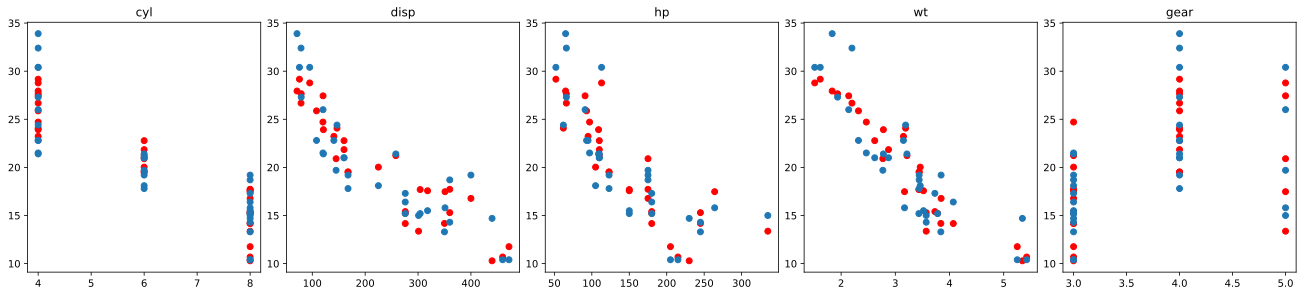

In [12]:
from sklearn import linear_model

fig, ax = plt.subplots(1, 5, figsize=(18, 4), constrained_layout=True)
clf = linear_model.Ridge(alpha=0.1)

Liner = clf.fit(X, Y)

print('Parameters')
print('sec:', Liner.score(X, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)


a = np.array(Liner.coef_)
b = Liner.intercept_
Y_new = np.matmul(X, a) + b


print('Square Norm:', ((Y_new - Y)**2).mean())

for index in range(5):
    ax[index].scatter(X[:, index], Y_new, label='ridge', color='red', linewidth=1)
    ax[index].scatter(X[:, index], Y)
    ax[index].set_title(columns[index])

Parameters
sec: 0.8451653646943661
Коэффициенты модели: [-0.91606895  0.00371606 -0.02707977 -2.74340179  0.58855902]
Свободный член: 35.52958601739512
Square Norm: 5.44847205042179


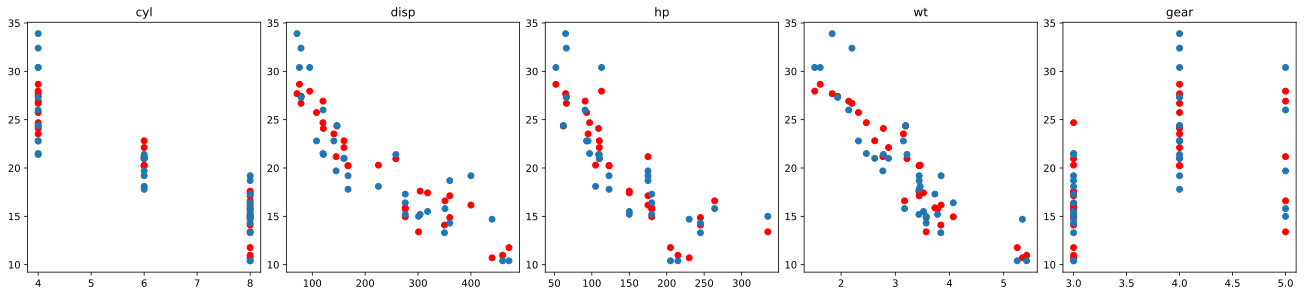

In [13]:
from sklearn import linear_model

fig, ax = plt.subplots(1, 5, figsize=(18, 4), constrained_layout=True)
clf = linear_model.ElasticNet(alpha=0.1)

Liner = clf.fit(X, Y)

print('Parameters')
print('sec:', Liner.score(X, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_
Y_new = np.matmul(X, a) + b

print('Square Norm:', ((Y_new - Y)**2).mean())

for index in range(5):
    ax[index].scatter(X[:, index], Y_new, label='ridge', color='red', linewidth=1)
    ax[index].scatter(X[:, index], Y)
    ax[index].set_title(columns[index])

Parameters
sec: 0.795766697200281
Коэффициенты модели: [-0.17813311 -0.01933398 -0.02521504 -1.21236955  0.        ]
Свободный член: 33.25282407332756
Square Norm: 5.44847205042179
Square Norm: 7.186760506608106


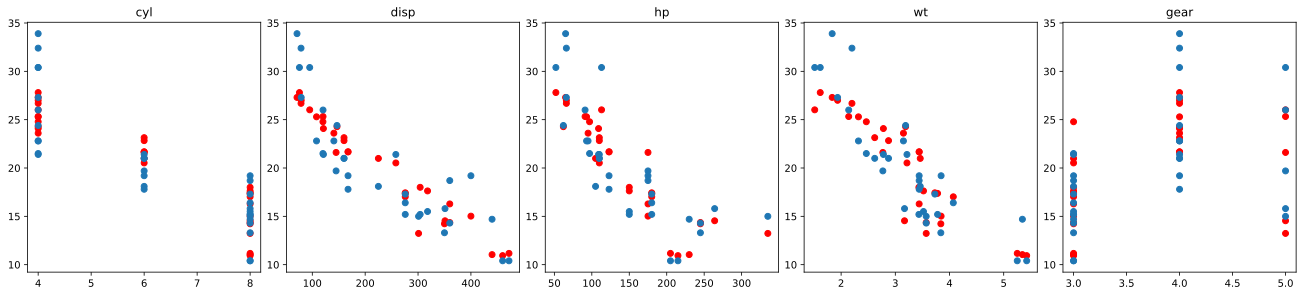

In [14]:
from sklearn import linear_model

fig, ax = plt.subplots(1, 5, figsize=(18, 4), constrained_layout=True)
clf = linear_model.Lasso(alpha=0.5)

Liner = clf.fit(X, Y)

print('Parameters')
print('sec:', Liner.score(X, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)
print('Square Norm:', ((Y_new - Y)**2).mean())

a = np.array(Liner.coef_)
b = Liner.intercept_
Y_new = np.matmul(X, a) + b

print('Square Norm:', ((Y_new - Y)**2).mean())

for index in range(5):
    ax[index].scatter(X[:, index], Y_new, label='ridge', color='red', linewidth=1)
    ax[index].scatter(X[:, index], Y)
    ax[index].set_title(columns[index])

(0.41999000000000003, -0.019790000000000006)

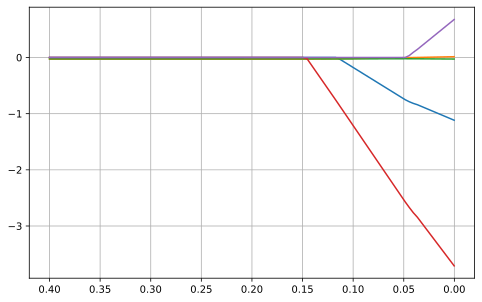

In [51]:
from sklearn import linear_model

alpha_lst = np.linspace(0.001, 2, 100)

alpha_y = list()

for alpha in alpha_lst:
    clf = linear_model.Lasso(alpha=alpha)

    Liner = clf.fit(X, Y)

    a = np.array(Liner.coef_)
    b = Liner.intercept_
    Y_new = np.matmul(X, a) + b
    
    alpha_y.append(list(Liner.coef_))
alpha_y = np.array(alpha_y).T
for i, arr in enumerate(alpha_y):
    plt.plot(alpha_lst/5, arr, label=f"{i}")
plt.grid()
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1]) 

(0.41999000000000003, -0.019790000000000006)

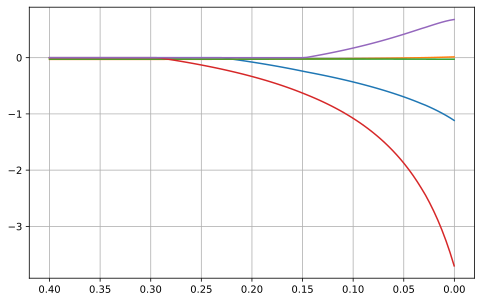

In [53]:
from sklearn import linear_model

alpha_lst = np.linspace(0.001, 2, 100)

alpha_y = list()

for alpha in alpha_lst:
    clf = linear_model.ElasticNet(alpha=alpha)

    Liner = clf.fit(X, Y)

    a = np.array(Liner.coef_)
    b = Liner.intercept_
    Y_new = np.matmul(X, a) + b
    
    alpha_y.append(list(Liner.coef_))
alpha_y = np.array(alpha_y).T
for i, arr in enumerate(alpha_y):
    plt.plot(alpha_lst/5, arr, label=f"{i}")
plt.grid()
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1]) 